# Introduction to Natural Language Processing (NLP)

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and human language. It involves developing algorithms and models that can understand, interpret, and generate human language.

## What you'll learn in this notebook:
1. Text Preprocessing
2. Tokenization
3. Stop Words Removal
4. Stemming and Lemmatization
5. Bag of Words (BoW)
6. TF-IDF (Term Frequency-Inverse Document Frequency)
7. Basic Sentiment Analysis
8. Introduction to Word Embeddings

In [1]:
! pip install nltk numpy pandas scikit-learn matplotlib seaborn

## 1. Setup and Imports

First, let's install and import the necessary libraries:

In [2]:
# Import necessary libraries
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Download NLTK data (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sujitbangera/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sujitbangera/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sujitbangera/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sujitbangera/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sujitbangera/nltk_data...


True

## 2. Text Preprocessing

Text preprocessing is a crucial step in NLP. It involves cleaning and preparing text data for analysis.

In [3]:
# Sample text for demonstration
sample_text = """Natural Language Processing (NLP) is AMAZING! 
It's a fascinating field that deals with teaching computers to understand human language. 
Visit https://www.example.com for more info. Contact: john@email.com #NLP #AI"""

print("Original text:")
print(sample_text)

Original text:
Natural Language Processing (NLP) is AMAZING! 
It's a fascinating field that deals with teaching computers to understand human language. 
Visit https://www.example.com for more info. Contact: john@email.com #NLP #AI


In [6]:
def preprocess_text(text):
    """Basic text preprocessing function"""
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

cleaned_text = preprocess_text(sample_text)
print("\nCleaned text:")
print(cleaned_text)


Cleaned text:
natural language processing nlp is amazing its a fascinating field that deals with teaching computers to understand human language visit for more info contact


## 3. Tokenization

Tokenization is the process of breaking down text into smaller units called tokens (words, sentences, etc.).

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt_tab')  # Ensure punkt tokenizer is downloaded

# Word tokenization
words = word_tokenize(cleaned_text)
print("Word tokens:")
print(words)
print(f"\nNumber of words: {len(words)}")

# Sentence tokenization
sentences = sent_tokenize(sample_text)
print("\nSentence tokens:")
for i, sent in enumerate(sentences):
    print(f"{i+1}. {sent}")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sujitbangera/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Word tokens:
['natural', 'language', 'processing', 'nlp', 'is', 'amazing', 'its', 'a', 'fascinating', 'field', 'that', 'deals', 'with', 'teaching', 'computers', 'to', 'understand', 'human', 'language', 'visit', 'for', 'more', 'info', 'contact']

Number of words: 24

Sentence tokens:
1. Natural Language Processing (NLP) is AMAZING!
2. It's a fascinating field that deals with teaching computers to understand human language.
3. Visit https://www.example.com for more info.
4. Contact: john@email.com #NLP #AI


## 4. Stop Words Removal

Stop words are common words that don't carry much meaning (e.g., 'the', 'is', 'at', 'which').

In [9]:
from nltk.corpus import stopwords

# Get English stop words
stop_words = set(stopwords.words('english'))
print(f"Number of stop words: {len(stop_words)}")
print(f"Sample stop words: {list(stop_words)[:10]}")

# Remove stop words
filtered_words = [word for word in words if word not in stop_words]
print(f"\nOriginal words ({len(words)}): {words}")
print(f"\nFiltered words ({len(filtered_words)}): {filtered_words}")

Number of stop words: 198
Sample stop words: ['its', "it'll", 'd', 'few', 'there', "weren't", "i'll", "should've", 'this', 'ain']

Original words (24): ['natural', 'language', 'processing', 'nlp', 'is', 'amazing', 'its', 'a', 'fascinating', 'field', 'that', 'deals', 'with', 'teaching', 'computers', 'to', 'understand', 'human', 'language', 'visit', 'for', 'more', 'info', 'contact']

Filtered words (16): ['natural', 'language', 'processing', 'nlp', 'amazing', 'fascinating', 'field', 'deals', 'teaching', 'computers', 'understand', 'human', 'language', 'visit', 'info', 'contact']


## 5. Stemming and Lemmatization

Both techniques reduce words to their base form, but lemmatization is more sophisticated.

In [10]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example words
example_words = ['running', 'runs', 'ran', 'easily', 'fairly', 'better', 'worse']

print("Word\t\tStem\t\tLemma")
print("-" * 40)
for word in example_words:
    stem = stemmer.stem(word)
    lemma = lemmatizer.lemmatize(word)
    print(f"{word}\t\t{stem}\t\t{lemma}")

Word		Stem		Lemma
----------------------------------------
running		run		running
runs		run		run
ran		ran		ran
easily		easili		easily
fairly		fairli		fairly
better		better		better
worse		wors		worse


In [8]:
# Apply lemmatization to our filtered words
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized words:")
print(lemmatized_words)

Lemmatized words:
['natural', 'language', 'processing', 'nlp', 'amazing', 'fascinating', 'field', 'deal', 'teaching', 'computer', 'understand', 'human', 'language', 'visit', 'info', 'contact']


## 6. Bag of Words (BoW)

Bag of Words is a simple way to represent text data as numerical features.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "Natural language processing is fascinating.",
    "Machine learning and NLP go hand in hand.",
    "Text analysis is a key part of NLP.",
    "Deep learning revolutionized natural language processing."
]

# Create BoW representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(documents)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=feature_names)
print("Bag of Words representation:")
print(bow_df)

Bag of Words representation:
   analysis  and  deep  fascinating  go  hand  in  is  key  language  \
0         0    0     0            1   0     0   0   1    0         1   
1         0    1     0            0   1     2   1   0    0         0   
2         1    0     0            0   0     0   0   1    1         0   
3         0    0     1            0   0     0   0   0    0         1   

   learning  machine  natural  nlp  of  part  processing  revolutionized  text  
0         0        0        1    0   0     0           1               0     0  
1         1        1        0    1   0     0           0               0     0  
2         0        0        0    1   1     1           0               0     1  
3         1        0        1    0   0     0           1               1     0  


## 7. TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF gives more weight to words that are important to a document but not common across all documents.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Convert to DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
).round(3)

print("TF-IDF representation:")
print(tfidf_df)

TF-IDF representation:
   analysis    and   deep  fascinating     go   hand     in     is  key  \
0       0.0  0.000  0.000        0.536  0.000  0.000  0.000  0.422  0.0   
1       0.0  0.329  0.000        0.000  0.329  0.658  0.329  0.000  0.0   
2       0.4  0.000  0.000        0.000  0.000  0.000  0.000  0.316  0.4   
3       0.0  0.000  0.472        0.000  0.000  0.000  0.000  0.000  0.0   

   language  learning  machine  natural    nlp   of  part  processing  \
0     0.422     0.000    0.000    0.422  0.000  0.0   0.0       0.422   
1     0.000     0.259    0.329    0.000  0.259  0.0   0.0       0.000   
2     0.000     0.000    0.000    0.000  0.316  0.4   0.4       0.000   
3     0.372     0.372    0.000    0.372  0.000  0.0   0.0       0.372   

   revolutionized  text  
0           0.000   0.0  
1           0.000   0.0  
2           0.000   0.4  
3           0.472   0.0  


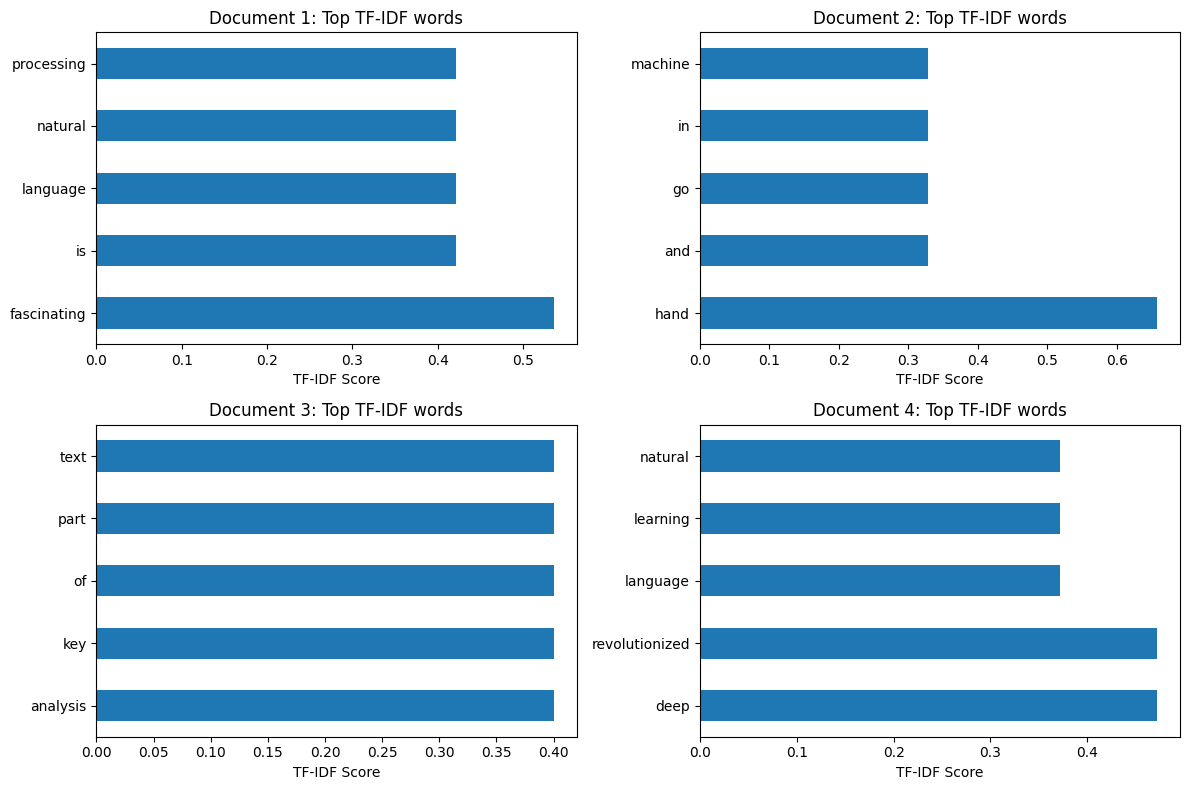

In [14]:
# Visualize important words in each document
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, (doc, ax) in enumerate(zip(documents, axes)):
    # Get TF-IDF scores for this document
    scores = tfidf_df.iloc[idx]
    top_words = scores.nlargest(5)
    
    # Plot
    top_words.plot(kind='barh', ax=ax)
    ax.set_title(f'Document {idx+1}: Top TF-IDF words')
    ax.set_xlabel('TF-IDF Score')

plt.tight_layout()
plt.show()

## 8. Basic Sentiment Analysis

Let's perform simple sentiment analysis using NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner).

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample texts for sentiment analysis
texts = [
    "I love this product! It's absolutely amazing.",
    "This is terrible. I hate it.",
    "It's okay, nothing special.",
    "The service was good but the food was bad.",
    "I'm not sure how I feel about this.",
    "The Blood pressure is high",
    "I had a wonderful experience, very satisfied!",
    "you have scored high marks in the exam"
]

# Analyze sentiment
results = []
for text in texts:
    scores = sia.polarity_scores(text)
    scores['text'] = text
    results.append(scores)

# Create DataFrame
sentiment_df = pd.DataFrame(results)
print("Sentiment Analysis Results:")
print(sentiment_df[['text', 'neg', 'neu', 'pos', 'compound']])

Sentiment Analysis Results:
                                            text    neg    neu    pos  \
0  I love this product! It's absolutely amazing.  0.000  0.318  0.682   
1                   This is terrible. I hate it.  0.694  0.306  0.000   
2                    It's okay, nothing special.  0.367  0.325  0.309   
3     The service was good but the food was bad.  0.347  0.511  0.142   
4            I'm not sure how I feel about this.  0.246  0.754  0.000   
5                     The Blood pressure is high  0.355  0.645  0.000   
6  I had a wonderful experience, very satisfied!  0.000  0.297  0.703   
7         you have scored high marks in the exam  0.000  1.000  0.000   

   compound  
0    0.8620  
1   -0.7783  
2   -0.0920  
3   -0.5859  
4   -0.2411  
5   -0.2960  
6    0.7955  
7    0.0000  


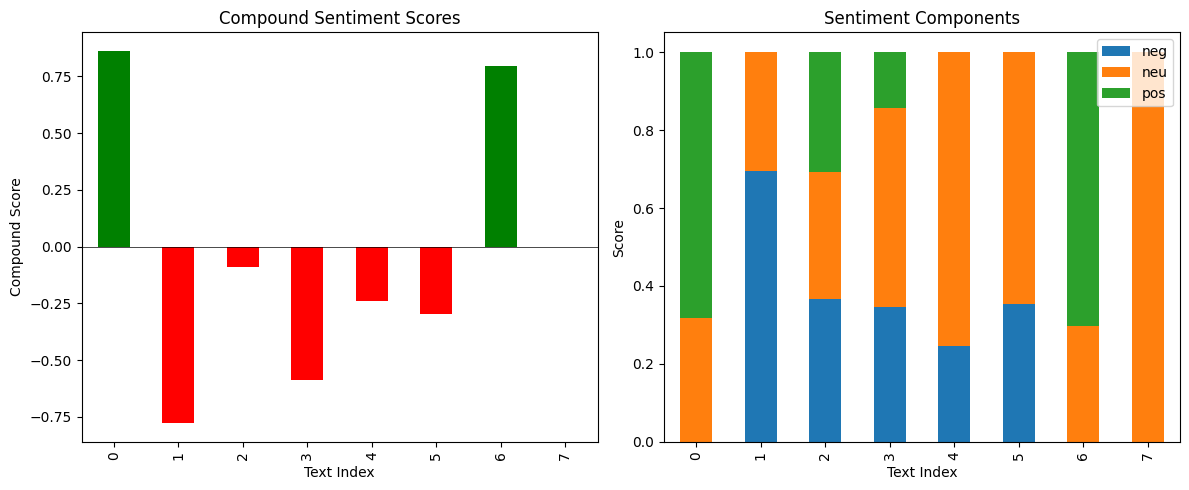

In [17]:
# Visualize sentiment scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot of compound scores
sentiment_df['compound'].plot(kind='bar', ax=ax1, color=['red' if x < 0 else 'green' for x in sentiment_df['compound']])
ax1.set_title('Compound Sentiment Scores')
ax1.set_xlabel('Text Index')
ax1.set_ylabel('Compound Score')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Stacked bar plot of sentiment components
sentiment_df[['neg', 'neu', 'pos']].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Sentiment Components')
ax2.set_xlabel('Text Index')
ax2.set_ylabel('Score')

plt.tight_layout()
plt.show()

## 9. Word Frequency Analysis

Let's analyze word frequencies in a larger text.

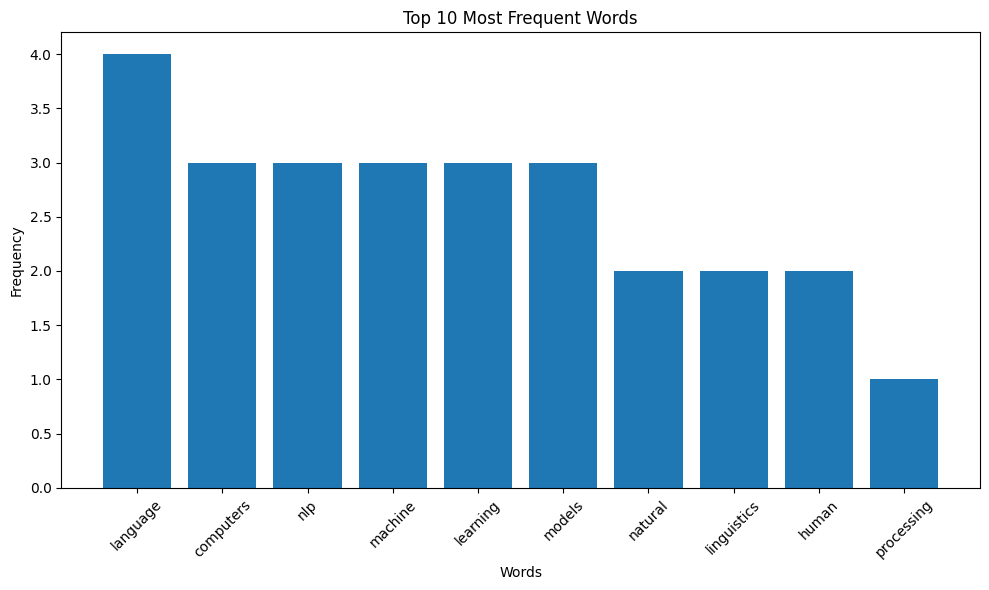

In [18]:
# Sample paragraph for analysis
paragraph = """
Natural language processing is a subfield of linguistics, computer science, and artificial intelligence 
concerned with the interactions between computers and human language. NLP combines computational 
linguistics with statistical, machine learning, and deep learning models. The goal is to enable 
computers to process and analyze large amounts of natural language data. Common NLP tasks include 
tokenization, parsing, lemmatization, speech recognition, and machine translation. Modern NLP heavily 
relies on machine learning algorithms and neural networks, particularly transformer models like BERT 
and GPT. These models have revolutionized how computers understand and generate human language.
"""

# Preprocess and tokenize
cleaned_paragraph = preprocess_text(paragraph)
words = word_tokenize(cleaned_paragraph)

# Remove stop words
words = [word for word in words if word not in stop_words and len(word) > 2]

# Count word frequencies
word_freq = Counter(words)
top_words = word_freq.most_common(10)

# Create visualization
words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Introduction to Word Embeddings

Word embeddings are dense vector representations of words that capture semantic meaning.

In [19]:
# Simple example of one-hot encoding vs embeddings concept
vocabulary = ['king', 'queen', 'man', 'woman', 'royal']

# One-hot encoding
print("One-hot encoding:")
for i, word in enumerate(vocabulary):
    one_hot = [0] * len(vocabulary)
    one_hot[i] = 1
    print(f"{word}: {one_hot}")

print("\nProblems with one-hot encoding:")
print("- High dimensionality")
print("- No semantic relationships")
print("- Sparse representation")

print("\nWord embeddings solve these problems by:")
print("- Dense, low-dimensional vectors")
print("- Capturing semantic relationships")
print("- Similar words have similar vectors")
print("\nPopular word embedding models:")
print("- Word2Vec")
print("- GloVe")
print("- FastText")
print("- Transformer-based embeddings (BERT, GPT)")

One-hot encoding:
king: [1, 0, 0, 0, 0]
queen: [0, 1, 0, 0, 0]
man: [0, 0, 1, 0, 0]
woman: [0, 0, 0, 1, 0]
royal: [0, 0, 0, 0, 1]

Problems with one-hot encoding:
- High dimensionality
- No semantic relationships
- Sparse representation

Word embeddings solve these problems by:
- Dense, low-dimensional vectors
- Capturing semantic relationships
- Similar words have similar vectors

Popular word embedding models:
- Word2Vec
- GloVe
- FastText
- Transformer-based embeddings (BERT, GPT)


## Summary and Next Steps

In this notebook, we covered the fundamental concepts of NLP:

1. **Text Preprocessing**: Cleaning and preparing text data
2. **Tokenization**: Breaking text into words and sentences
3. **Stop Words Removal**: Filtering out common words
4. **Stemming/Lemmatization**: Reducing words to their base form
5. **Bag of Words**: Simple numerical representation
6. **TF-IDF**: Weighted word importance
7. **Sentiment Analysis**: Understanding text emotion
8. **Word Embeddings**: Dense vector representations

### Next Steps:
- Explore advanced models like Word2Vec and BERT
- Try named entity recognition (NER)
- Build a text classification model
- Experiment with text generation
- Learn about transformer architectures

### Recommended Resources:
- NLTK Book: https://www.nltk.org/book/
- spaCy Documentation: https://spacy.io/
- Hugging Face Transformers: https://huggingface.co/transformers/
- Stanford NLP Course: https://web.stanford.edu/class/cs224n/

In [16]:
# Practice Exercise: Analyze your own text
# TODO: Replace this with your own text
your_text = "Enter your text here to analyze..."

# Apply what you learned
# 1. Preprocess the text
# 2. Tokenize it
# 3. Remove stop words
# 4. Perform sentiment analysis
# 5. Create a word frequency visualization